In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns

<h3>Se cargan los datos</h3>

In [2]:
# Let's assume that "population" is a numpy ndarray with your genomes as rows.
def calculate_hamming_matrix(population):
    # Number of genomes
    num_genomes = population.shape[0]
    # Create an empty matrix for Hamming distances
    hamming_matrix = np.zeros((num_genomes, num_genomes), dtype=int)
   # Calculate the Hamming distance between each pair of genomes
    for i in range(num_genomes):
        for j in range(i+1, num_genomes):  # j=i+1 to avoid calculating the same distance twice
            # The Hamming distance is multiplied by the number of genes to convert it into an absolute distance
            distance = hamming(population[i], population[j]) * len(population[i])
            hamming_matrix[i, j] = distance
            hamming_matrix[j, i] = distance  # The matrix is symmetric
    
    return hamming_matrix

In [3]:
def create_complex(distance_matrix2):
    # Create the Rips simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix2)
    # Create the simplex tree from the Rips complex with a maximum dimension of 3
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # Compute the persistence of the simplicial complex
    persistence = simplex_tree.persistence()
    # Return the persistence diagram or barcode
    return persistence, simplex_tree


In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [5]:
def visualize_simplicial_complex(simplex_tree, filtration_value, vertex_names=None, save_filename=None, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # List to store triangles (3-nodes simplices)
    
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
            elif len(simplex) == 1:
                G.add_node(simplex[0])
            elif len(simplex) == 3:
                triangles.append(simplex)
    
    # Calculate node positions if not provided
    if pos is None:
        pos = nx.spring_layout(G)
    
    # Node trace
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_labels = [vertex_names[node] if vertex_names else str(node) for node in G.nodes()]
    node_trace = go.Scatter(x=x_values, y=y_values, mode='markers+text', hoverinfo='text', marker=dict(size=14), text=node_labels, textposition='top center', textfont=dict(size=14))
    
    # Edge traces
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=3, color='rgba(0,0,0,0.5)'))
        edge_traces.append(edge_trace)
    
    # Triangle traces
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], fill='toself', mode='lines+markers', line=dict(width=2), fillcolor='rgba(255,0,0,0.2)')
        triangle_traces.append(triangle_trace)
    
    # Configure the layout of the plot
    layout = go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')))
    
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Set the figure size
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Save the figure if a filename is provided
    if save_filename:
        pio.write_image(fig, save_filename, width=plot_size * dpi, height=plot_size * dpi, scale=1)
    
    # Show the figure
    fig.show()

    
    

    return G

<h1> EJEMPLO</h1>

In [6]:
link="https://raw.githubusercontent.com/shadayguerrero/TDA_Horizontal_Genes_Transfer/main/data/BVBRC_protein_families_all_final.csv"
short=pd.read_csv(link,index_col=0)
short
# Re-index for the Strain
df_reindexed = short.set_index('Strain', inplace=False)

In [7]:
names_to_search = [
    "PGF_04886779", "PGF_04370656", "PGF_07342234", "PGF_03299821", "PGF_05419346",
    "PGF_03084064", "PGF_04563108", "PGF_00414310", "PGF_00022105", "PGF_05419346",
    "PGF_06607596", "PGF_00047661", "PGF_00216543", "PGF_08225224", "PGF_08225224",
    "PGF_00110526", "PGF_00355535", "PGF_01650562", "PGF_04243824", "PGF_02333019",
    "PGF_08225224", "PGF_03145724", "PGF_06495825", "PGF_00452501", "PGF_05493974",
    "PGF_00020282", "PGF_06958254", "PGF_09224510", "PGF_07563198", "PGF_01000105",
    "PGF_01031760", "PGF_01569843", "PGF_01077017", "PGF_01000105", "PGF_02752571",
    "PGF_00410347", "PGF_01958521", "PGF_08225224", "PGF_07207755", "PGF_00010376",
    "PGF_03543440", "PGF_05156704", "PGF_01000105", "PGF_01000105", "PGF_02932429",
    "PGF_06674747", "PGF_07498135", "PGF_10469466", "PGF_08225224", "PGF_01958554",
    "PGF_05971953", "PGF_00904239", "PGF_00424315", "PGF_08238808", "PGF_08225224",
    "PGF_08238808", "PGF_08225224", "PGF_00013862", "PGF_00013864", "PGF_10387734",
    "PGF_09290469", "PGF_08225224", "PGF_00013946", "PGF_01949998", "PGF_00013916",
    "PGF_08972330", "PGF_08225224", "PGF_00013925", "PGF_00013923", "PGF_03830470",
    "PGF_00326234", "PGF_00163448", "PGF_00013943", "PGF_02913871", "PGF_00013942",
    "PGF_00615364", "PGF_00335754", "PGF_07717077", "PGF_00013945", "PGF_00013871",
    "PGF_03332290", "PGF_08225224", "PGF_06611914", "PGF_00089171", "PGF_06560088",
    "PGF_00106691", "PGF_04419840", "PGF_00467825", "PGF_00013893", "PGF_00013875",
    "PGF_01246464", "PGF_00013866", "PGF_08225224", "PGF_00859415", "PGF_00013863",
    "PGF_00411196", "PGF_00326542", "PGF_00064344", "PGF_07396822", "PGF_07978541",
    "PGF_01595863", "PGF_06275535", "PGF_06275535", "PGF_01950491", "PGF_01958592",
    "PGF_01009331", "PGF_00038929", "PGF_00038932", "PGF_05682743", "PGF_00064362",
    "PGF_02142873", "PGF_04180579", "PGF_00072490", "PGF_07517035", "PGF_00324174",
    "PGF_00106708", "PGF_10494469", "PGF_08970263", "PGF_08225224", "PGF_00060224", 
    "PGF_00415171", "PGF_07518314", "PGF_00424726"]
selected_columns = [col for col in df_reindexed.columns if any(word in col for word in names_to_search)]
column_index = [df_reindexed.columns.get_loc(col) for col in selected_columns]

# Create a new DataFrame with only the selected columns
df_filtered = df_reindexed[selected_columns]

len(names_to_search)

123

In [8]:
strain_names=list(df_reindexed.index)

In [9]:
#PatientA_B=all.iloc[:,4438:4520].values
PatientA_B=df_reindexed.iloc[:,4020:4520].values
PatientA_B

array([[0, 1, 1, ..., 0, 2, 0],
       [1, 1, 1, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 2, 2],
       [0, 1, 1, ..., 0, 0, 0]])

In [10]:
hamming_matrix_3 = calculate_hamming_matrix(PatientA_B)
persistence3, simplex_tree3 = create_complex(hamming_matrix_3)
persistence3

[(1, (118.0, 145.0)),
 (1, (88.0, 112.0)),
 (0, (0.0, inf)),
 (0, (0.0, 108.0)),
 (0, (0.0, 85.0)),
 (0, (0.0, 72.0)),
 (0, (0.0, 61.0)),
 (0, (0.0, 53.0)),
 (0, (0.0, 43.0)),
 (0, (0.0, 31.0)),
 (0, (0.0, 30.0)),
 (0, (0.0, 18.0)),
 (0, (0.0, 18.0)),
 (0, (0.0, 18.0))]

usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence barcode'}>

<Figure size 100x100 with 0 Axes>

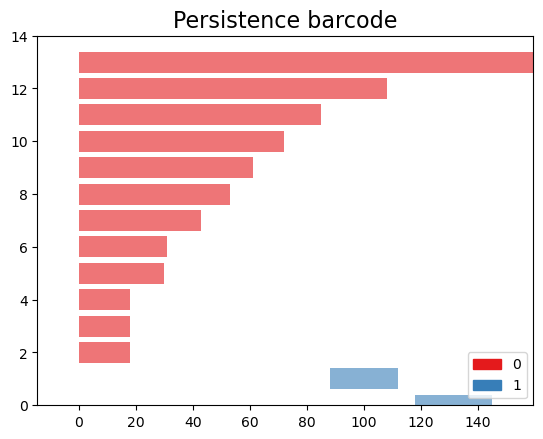

In [11]:
# Adjusting the size of the plot
plt.figure(figsize=(1, 1))  # You can adjust these numbers as per your needs
# Adjusting the layout
plt.tight_layout()
gd.plot_persistence_barcode(persistence3, legend=True)


In [13]:
visualize_simplicial_complex(simplex_tree3,100)